<a href="https://colab.research.google.com/github/mmura001/Healthbot/blob/main/Data_BBN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install StringIO

ERROR: Could not find a version that satisfies the requirement StringIO (from versions: none)
ERROR: No matching distribution found for StringIO


In [2]:
pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.2 MB/s eta 0:00:00


In [ ]:
pip install bayesian

In [3]:
pip install pybbn

  Preparing metadata (setup.py) ... done
  Created wheel for pybbn: filename=pybbn-3.2.3-py3-none-any.whl size=40373 sha256=c9f05d0526c23edd1c456ac61909ecc38e3a8fa3bfa17b1b197f9cb599c45ddb
  Stored in directory: /root/.cache/pip/wheels/a7/6f/f1/ec7566a4882ab5c796fb43dfd84062769f75ba5381ca60d2b6
Successfully built pybbn


In [ ]:
from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController

# create the nodes
a = BbnNode(Variable(0, 'a', ['on', 'off']), [0.5, 0.5])
b = BbnNode(Variable(1, 'b', ['on', 'off']), [0.5, 0.5, 0.4, 0.6])
c = BbnNode(Variable(2, 'c', ['on', 'off']), [0.7, 0.3, 0.2, 0.8])
d = BbnNode(Variable(3, 'd', ['on', 'off']), [0.9, 0.1, 0.5, 0.5])
e = BbnNode(Variable(4, 'e', ['on', 'off']), [0.3, 0.7, 0.6, 0.4])
f = BbnNode(Variable(5, 'f', ['on', 'off']), [0.01, 0.99, 0.01, 0.99, 0.01, 0.99, 0.99, 0.01])
g = BbnNode(Variable(6, 'g', ['on', 'off']), [0.8, 0.2, 0.1, 0.9])
h = BbnNode(Variable(7, 'h', ['on', 'off']), [0.05, 0.95, 0.95, 0.05, 0.95, 0.05, 0.95, 0.05])

# create the network structure
bbn = Bbn() \
    .add_node(a) \
    .add_node(b) \
    .add_node(c) \
    .add_node(d) \
    .add_node(e) \
    .add_node(f) \
    .add_node(g) \
    .add_node(h) \
    .add_edge(Edge(a, b, EdgeType.DIRECTED)) \
    .add_edge(Edge(a, c, EdgeType.DIRECTED)) \
    .add_edge(Edge(b, d, EdgeType.DIRECTED)) \
    .add_edge(Edge(c, e, EdgeType.DIRECTED)) \
    .add_edge(Edge(d, f, EdgeType.DIRECTED)) \
    .add_edge(Edge(e, f, EdgeType.DIRECTED)) \
    .add_edge(Edge(c, g, EdgeType.DIRECTED)) \
    .add_edge(Edge(e, h, EdgeType.DIRECTED)) \
    .add_edge(Edge(g, h, EdgeType.DIRECTED))

# convert the BBN to a join tree
join_tree = InferenceController.apply(bbn)

# insert an observation evidence
ev = EvidenceBuilder() \
    .with_node(join_tree.get_bbn_node_by_name('a')) \
    .with_evidence('on', 1.0) \
    .build()
join_tree.set_observation(ev)

# print the marginal probabilities
for node in join_tree.get_bbn_nodes():
    potential = join_tree.get_bbn_potential(node)
    print(node)
    print(potential)

3|d|on,off
3=on|0.70000
3=off|0.30000
4|e|on,off
4=on|0.39000
4=off|0.61000
5|f|on,off
5=on|0.18934
5=off|0.81066
6|g|on,off
6=on|0.59000
6=off|0.41000
7|h|on,off
7=on|0.78260
7=off|0.21740
2|c|on,off
2=on|0.70000
2=off|0.30000
1|b|on,off
1=on|0.50000
1=off|0.50000
0|a|on,off
0=on|1.00000
0=off|0.00000


In [4]:
pip install pgmpy


In [10]:
import warnings
import numpy as np
import pandas as pd
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [6]:
warnings.filterwarnings("ignore")

In [12]:
data = pd.read_csv("Target.csv")
data = data.dropna()
data = data.drop_duplicates()
data.describe()

,Sport,TotPkts,TotBytes,SrcPkts,DstPkts,SrcBytes,Target
count,2507.000000,2507.000000,2507.000000,2507.000000,2507.000000,2507.000000,2507.000000
mean,54161.925010,19.250100,1296.586358,10.440367,8.809733,716.201835,0.207020
std,5008.875299,9.699931,2535.545120,5.609458,4.224366,1837.542137,0.405251
min,0.000000,1.000000,60.000000,1.000000,0.000000,60.000000,0.000000
25%,55039.500000,18.000000,1152.000000,10.000000,8.000000,644.000000,0.000000
50%,55667.000000,20.000000,1276.000000,10.000000,8.000000,644.000000,0.000000
75%,56293.500000,20.000000,1276.000000,10.000000,10.000000,644.000000,0.000000
max,58312.000000,356.000000,91008.000000,206.000000,150.000000,65808.000000,1.000000


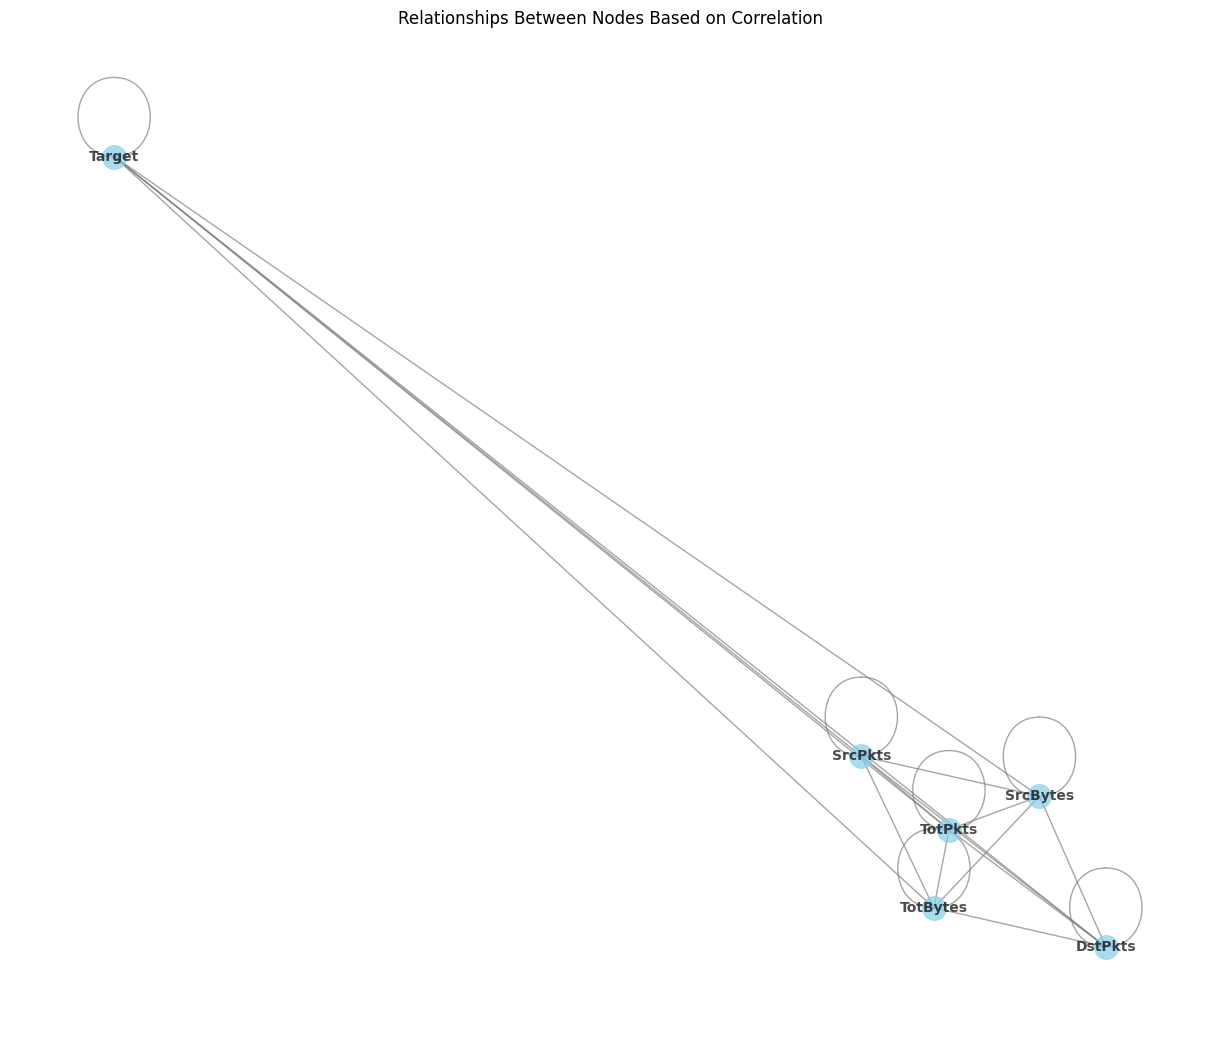

In [13]:
data.drop("Sport", axis=1, inplace=True)

# Create a correlation matrix
corr_matrix = data.corr()

# Create a graph from the correlation matrix
G = nx.from_pandas_adjacency(corr_matrix)

# Draw the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, font_size=10, font_color="black", font_weight="bold", cmap="coolwarm", node_color="skyblue", edge_color="gray", linewidths=0.5, alpha=0.7)
plt.title("Relationships Between Nodes Based on Correlation")
plt.show()


Correlation matrix:
           TotPkts  TotBytes   SrcPkts   DstPkts  SrcBytes    Target
TotPkts   1.000000  0.985751  0.989770  0.981889  0.981531  0.003573
TotBytes  0.985751  1.000000  0.984284  0.956456  0.999510 -0.001257
SrcPkts   0.989770  0.984284  1.000000  0.944814  0.983797  0.106631
DstPkts   0.981889  0.956456  0.944814  1.000000  0.947413 -0.133389
SrcBytes  0.981531  0.999510  0.983797  0.947413  1.000000  0.010558
Target    0.003573 -0.001257  0.106631 -0.133389  0.010558  1.000000


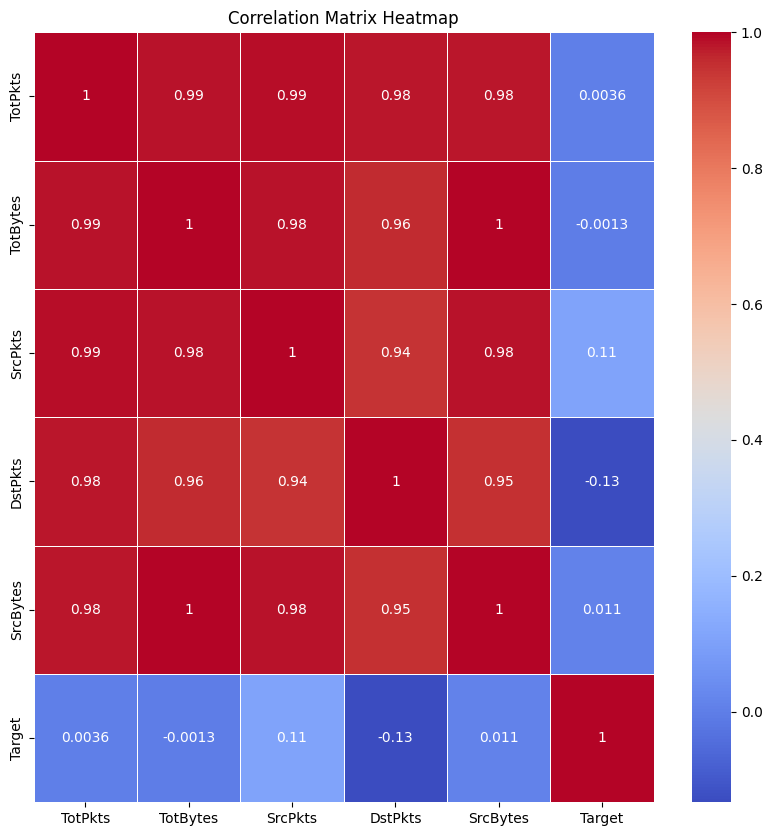

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr_matrix = data.corr()

# Display the correlation matrix
print("\nCorrelation matrix:")
print(corr_matrix)

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [15]:
# Define a Bayesian Model
bayesian_model = BayesianModel()

# Add nodes to the Bayesian Model
bayesian_model.add_nodes_from(corr_matrix.columns)

In [16]:
# Iterate over the upper triangle of the correlation matrix to add edges
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        correlation_value = corr_matrix.iloc[i, j]
        if abs(correlation_value) > 0.95 or (0<= correlation_value <= 0.1):  # Adjust the threshold as needed
            bayesian_model.add_edge(corr_matrix.columns[i], corr_matrix.columns[j])

In [17]:
model = BayesianModel(bayesian_model.edges())

In [ ]:
# model = BayesianModel([("TotPkts","SrcPkts"), ("TotBytes","SrcBytes"),("TotPkts","DstPkts"), ("SrcPkts","DstPkts"), ("DstPkts","Target"), ("SrcBytes","Target")])

In [18]:
cpd_TotPkts = MaximumLikelihoodEstimator(model,data).estimate_cpd("TotPkts")
cpd_SrcPkts = MaximumLikelihoodEstimator(model,data).estimate_cpd("SrcPkts")
cpd_TotBytes = MaximumLikelihoodEstimator(model,data).estimate_cpd("TotBytes")
cpd_SrcBytes = MaximumLikelihoodEstimator(model,data).estimate_cpd("SrcBytes")
cpd_DstPkts = MaximumLikelihoodEstimator(model,data).estimate_cpd("DstPkts")
cpd_Target = BayesianEstimator(model,data).estimate_cpd("Target",prior_type="BDeu", equivalent_sample_size=20)

In [19]:
model.add_cpds(cpd_TotPkts,cpd_SrcPkts,cpd_TotBytes,cpd_SrcBytes,cpd_DstPkts,cpd_Target)

In [20]:
model.check_model()

True

In [21]:
model.checker = VariableElimination(model)

In [22]:
result = model.checker.query(variables=["Target"],evidence={"TotPkts" : 352,"TotBytes" : 90736, "SrcPkts" : 202, "DstPkts" : 150,  "SrcBytes" : 65536})
print(result)

+-----------+---------------+
| Target    |   phi(Target) |
+===========+===============+
| Target(0) |        0.9597 |
+-----------+---------------+
| Target(1) |        0.0403 |
+-----------+---------------+
